In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import seaborn as sns

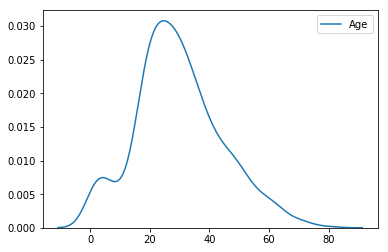

In [14]:
sns.kdeplot(df['Age'])


In [16]:
df['Age'].isnull().sum()

177

In [17]:
df[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


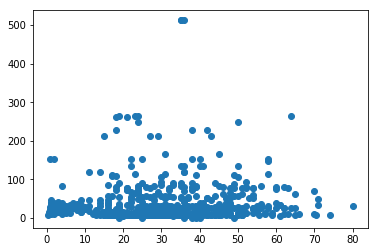

In [18]:
plt.scatter(df['Age'],df['Fare'])

In [19]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df=df.drop('Cabin',axis=1)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df['Embarked']=df['Embarked'].fillna(value='S')

In [28]:
df[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [33]:
df=df.drop(['Name','Ticket','PassengerId'],axis=1)

In [34]:
df[:1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [35]:
df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked'])

In [36]:
df[:1]

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.25,0,0,1,0,1,0,0,1


### Preprocessing
def preprocess(df):
  
    # Drop rows with NaN values
    df = df.dropna()

    # Drop text based features (we'll learn how to use them in later lessons)
    features_to_drop = ["name", "cabin", "ticket"]
    df = df.drop(features_to_drop, axis=1)

    # pclass, sex, and embarked are categorical features
    categorical_features = ["pclass","embarked","sex"]
    df = pd.get_dummies(df, columns=categorical_features)

    return df

In [191]:
X=df.drop(['Survived','Embarked_Q'],axis=1)


In [192]:
y=df['Survived']

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [194]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

# Apply scaler on training and test data (don't standardize outputs for classification)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_test = X_scaler.transform(X_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [195]:
np.mean(standardized_X_train, axis=0)# mean should be ~0
#np.std(standardized_X_train, axis=0)

array([ 1.96782045e-16, -1.59553010e-17, -2.92513851e-17, -1.59553010e-17,
       -1.86145178e-17,  5.31843365e-17,  4.58714902e-17, -7.71172879e-17,
        7.71172879e-17, -5.85027702e-17, -1.17005540e-16])

In [196]:
# Initialize the model
log_reg = SGDClassifier(loss="log", penalty="none", max_iter=100,random_state=101)

In [197]:
# Train
log_reg.fit(X=standardized_X_train, y=y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=101, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [198]:
# Probabilities
pred_test = log_reg.predict_proba(standardized_X_test)
print (pred_test[:5])

[[0.61557013 0.38442987]
 [0.00834234 0.99165766]
 [0.42478665 0.57521335]
 [0.72650949 0.27349051]
 [0.84515033 0.15484967]]


In [199]:
# Predictions (unstandardize them)
pred_train = log_reg.predict(standardized_X_train) 
pred_test = log_reg.predict(standardized_X_test)
print (pred_test[:5])

[0 1 1 0 0]


In [200]:
from sklearn.metrics import classification_report,confusion_matrix

In [201]:
confusion_matrix(y_test,pred_test)

array([[100,  27],
       [ 27,  69]], dtype=int64)

In [202]:
from sklearn.metrics import f1_score

In [203]:
f1_score(y_test,pred_test)

0.71875

In [150]:
# Input your information
X_infer = pd.DataFrame([{"Name": "Onkar Sabnis", "Cabin": "E", "Ticket": "E44", 
                         "Pclass": 3, "Age": 29, "SibSp": 1, "Parch": 2, 
                         "Fare": 100, "Embarked": "C", "Sex": "male"}])
X_infer.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
0,29,E,C,100,Onkar Sabnis,2,3,male,1,E44


In [151]:
X_infer=X_infer.drop(['Ticket','Name','Cabin'],axis=1)

In [152]:
X_infer

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,29,C,100,2,3,male,1


In [153]:
X_infer=pd.get_dummies(X_infer,columns=['Embarked','Sex','Pclass'])

In [154]:
X_infer

,Age,Fare,Parch,SibSp,Embarked_C,Sex_male,Pclass_3
0,29,100,2,1,1,1,1


In [155]:

# Add missing columns
missing_features = set(X_test.columns) - set(X_infer.columns)
for feature in missing_features:
    X_infer[feature] = 0

# Reorganize header
X_infer = X_infer[X_train.columns]
X_infer.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,29,1,2,100,0,0,1,0,1,1,0,0


In [156]:
# Standardize
standardized_X_infer = X_scaler.transform(X_infer)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [157]:
# Predict
y_infer = log_reg.predict_proba(standardized_X_infer)
classes = {0: "died", 1: "survived"}
_class = np.argmax(y_infer)

In [158]:
y_infer

array([[0.72502053, 0.27497947]])

In [159]:
y_infer[0][_class]*100.0

72.50205316312595

In [160]:
# Predict
y_infer = log_reg.predict_proba(standardized_X_infer)
classes = {0: "died", 1: "survived"}
_class = np.argmax(y_infer)
print ("Looks like I would've {0} with about {1:.0f}% probability on the Titanic expedition!".format(
    classes[_class], y_infer[0][_class]*100.0))

Looks like I would've died with about 73% probability on the Titanic expedition!


In [162]:
# Unstandardize coefficients 
coef = log_reg.coef_ / X_scaler.scale_
intercept = log_reg.intercept_ - np.sum((coef * X_scaler.mean_))
print (coef)
print (intercept)

[[-0.03955274 -0.44504856  0.51779372  0.00873911  1.4526943  -0.2051134
  -0.91337991  1.44416349 -1.44416349  0.01844631 -0.06898253  0.01300605]]
[1.05217365]


In [163]:
indices = np.argsort(coef)
features = list(X_train.columns)
print ("Features correlated with death:", [features[i] for i in indices[0][:3]])
print ("Features correlated with survival:", [features[i] for i in indices[0][-3:]])

Features correlated with death: ['Sex_male', 'Pclass_3', 'SibSp']
Features correlated with survival: ['Parch', 'Sex_female', 'Pclass_1']


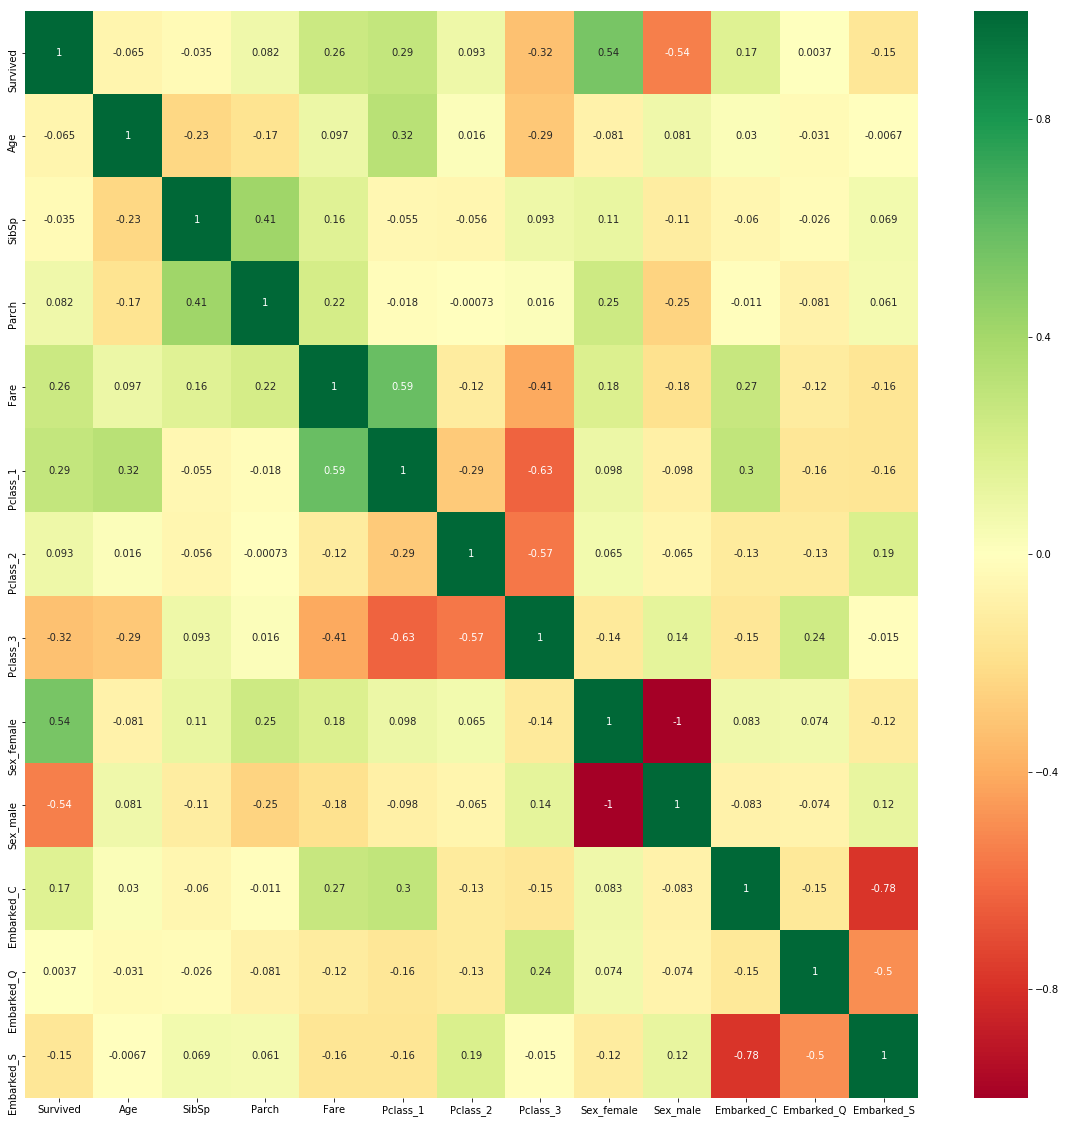

In [174]:
E = df.iloc[:,1:13]  #independent columns
f = df.iloc[:,0]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [181]:
len(pred_prob)

223

In [186]:
len(standardized_X_test)

223